# Astropy Tutorial
Here we will load a single fits file from the hat-p-23b observation using Astropy and plot with matplotlib.

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [3]:
file = fits.open('/Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/hatp23b-0001_lrp_out.fits')
#contains HDU data header unit...
file.info()
file_data = file[0].data
print(file_data)

Filename: /Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/hatp23b-0001_lrp_out.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4096)   int16 (rescales to uint16)   
[[1913 1894 1898 ... 1948 1931 1990]
 [1884 1963 1906 ... 2051 2021 1919]
 [1886 2001 1934 ... 1998 1972 2081]
 ...
 [2024 2053 2088 ... 2067 2013 2080]
 [2052 1973 2057 ... 2063 2180 1966]
 [1784 1808 2076 ... 2590 2266 1960]]


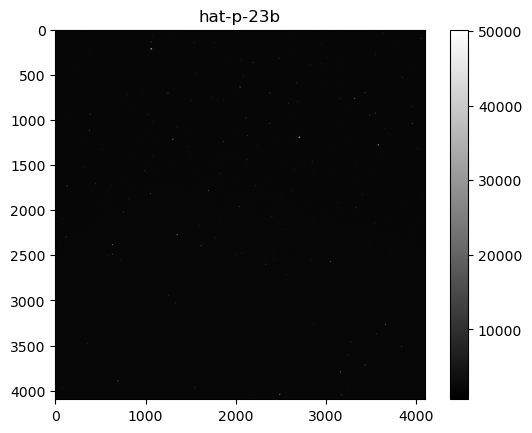

In [4]:
plt.imshow(file_data, cmap='gray')
plt.title("hat-p-23b")
plt.colorbar()

In [5]:
import astropy.wcs.utils as awu

#skycoord_to_pixel converts a wcs header into a numpy array that stores the specific pixel values.
#hatp23_pix = awu.skycoord_to_pixel()
xcoord = 2400
ycoord = 2020
pix = 8
#the star is roughly 15x15 pixels (from AIJ), hence we will sum the surrounding pixel values
print(file_data[2405][2025])
print(file_data[0][0])

#sum the target star pixel values, ranges based on aij but should be pulled from image header.
def sum_pixels(x_pix, y_pix, pixel):
    pix_sum = 0
    for i in range(x_pix, x_pix + pixel):
        for j in range(y_pix, y_pix + pixel):
            pix_sum = pix_sum + file_data[i][j]
            i=i+1
        j=j+1
    print(pix_sum)
    
sum_pixels(xcoord, ycoord, pix)

2028
1913
2400
2020
8
127364


Attempt to load our WCS from file to then pass to the skycoord_to_pixel method, this needs to be worked on.

In [6]:
from astropy import wcs
def load_wcs_from_file(filename):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)

    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdulist[0].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

    # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # Three pixel coordinates of interest.
    # Note we've silently assumed an NAXIS=2 image here.
    # The pixel coordinates are pairs of [X, Y].
    # The "origin" argument indicates whether the input coordinates
    # are 0-based (as in Numpy arrays) or
    # 1-based (as in the FITS convention, for example coordinates
    # coming from DS9).
    pixcrd = np.array([[0, 0], [24, 38], [45, 98]], dtype=np.float64)

    # Convert pixel coordinates to world coordinates
    # The second argument is "origin" -- in this case we're declaring we
    # have 0-based (Numpy-like) coordinates.
    world = w.wcs_pix2world(pixcrd, 0)
    print(world)

    # Convert the same coordinates back to pixel coordinates.
    pixcrd2 = w.wcs_world2pix(world, 0)
    print(pixcrd2)

    # These should be the same as the original pixel coordinates, modulo
    # some floating-point error.
    assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

    # The example below illustrates the use of "origin" to convert between
    # 0- and 1- based coordinates when executing the forward and backward
    # WCS transform.
    x = 0
    y = 0
    origin = 0
    assert w.wcs_pix2world(x, y, origin) == w.wcs_pix2world(x + 1, y + 1, origin + 1)

load_wcs_from_file('/Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/hatp23b-0001_lrp_out.fits')


       flag: 137
      naxis: 2
      crpix: 0x110683230
               2048.5       2048.5    
         pc: 0x1106831e0
    pc[0][]:  -0.00013008  -5.6458e-06
    pc[1][]:   5.6997e-06  -0.00013005
      cdelt: 0x110683240
               1.0000       1.0000    
      crval: 0x11063c160
               306.17       16.764    
      cunit: 0x151ea6d50
             "deg"
             "deg"
      ctype: 0x1106c96d0
             "RA---TAN-SIP"
             "DEC--TAN-SIP"
    lonpole: 180.000000
    latpole: 16.763624
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x1106b8070
    cd[0][]:  -0.00013008  -5.6458e-06
    cd[1][]:   5.6997e-06  -0.00013005
      crota: 0x11063c170
               0.0000       0.0000    
     altlin: 2
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x1113610a0
                 0      0
      cname: 0x1106c9760
             UNDEFINED
             UN